In [1]:
from pyedflib import highlevel
import pyedflib as plib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

Importando dados:
```txt
Seizure n 1
File name: PN00-1.edf
Registration start time: 19.39.33
Registration end time:  20.22.58
Seizure start time: 19.58.36
Seizure end time: 19.59.46
Data Sampling Rate: 512 Hz
```


In [8]:
path = "./PN00-1.edf"
signals, signal_headers, header = highlevel.read_edf(path)

{'technician': '', 'recording_additional': '', 'patientname': '', 'patient_additional': '', 'patientcode': '', 'equipment': '', 'admincode': '', 'sex': '', 'startdate': datetime.datetime(2016, 1, 1, 19, 39, 33), 'birthdate': '', 'gender': '', 'annotations': []}


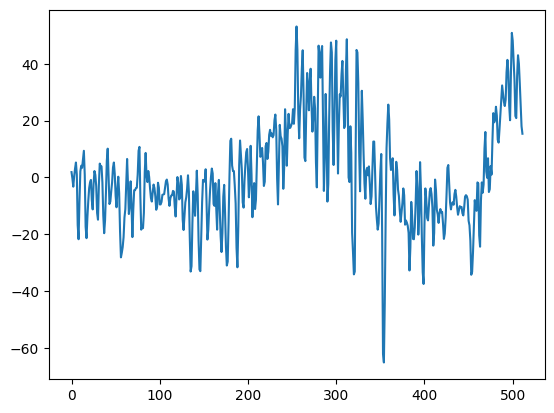

In [7]:
df = pd.DataFrame(signals.T, columns=[a['label'] for a in signal_headers])

plt.plot(df['EEG Fp1'][:512])
plt.show()

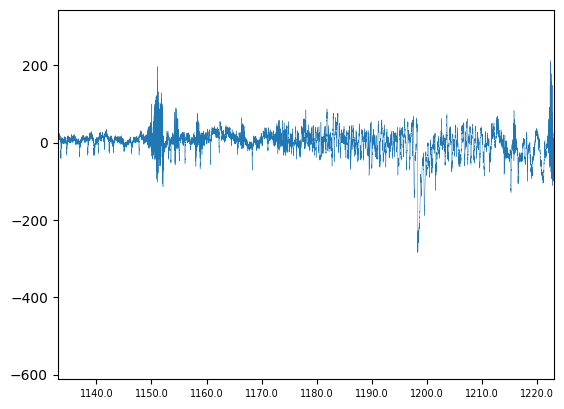

In [4]:
from datetime import datetime, timedelta

start = datetime.strptime("19.39.33", "%H.%M.%S")
end = datetime.strptime("20.22.58", "%H.%M.%S")
seizure_start = datetime.strptime("19.58.36", "%H.%M.%S")
seizure_end = datetime.strptime("19.59.46", "%H.%M.%S")

# plotting only the seizure data
start_time_s = (seizure_start - start).seconds
end_time_s = (seizure_end - start).seconds

plt.plot(signals[2], linewidth=0.3)
plt.xticks(np.arange(0,signals.shape[1], 5120),
           np.arange(0, signals.shape[1]/512, 10),fontsize=7)

plt.xlim(512*(start_time_s-10), 512*(end_time_s+10))

plt.show()

/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:167: RuntimeWarning: overflow encountered in power
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:167: RuntimeWarning: overflow encountered in exp
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:167: RuntimeWarning: overflow encountered in multiply
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:167: RuntimeWarning: invalid value encountered in multiply
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:190: RuntimeWarning: invalid value encountered in multiply
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:190: RuntimeWarning: overflow encountered in multiply
/home/grey/.local/lib/python3.10/site-packages/spkit/core/cwt.py:188: RuntimeWarning: invalid value encountered in multiply


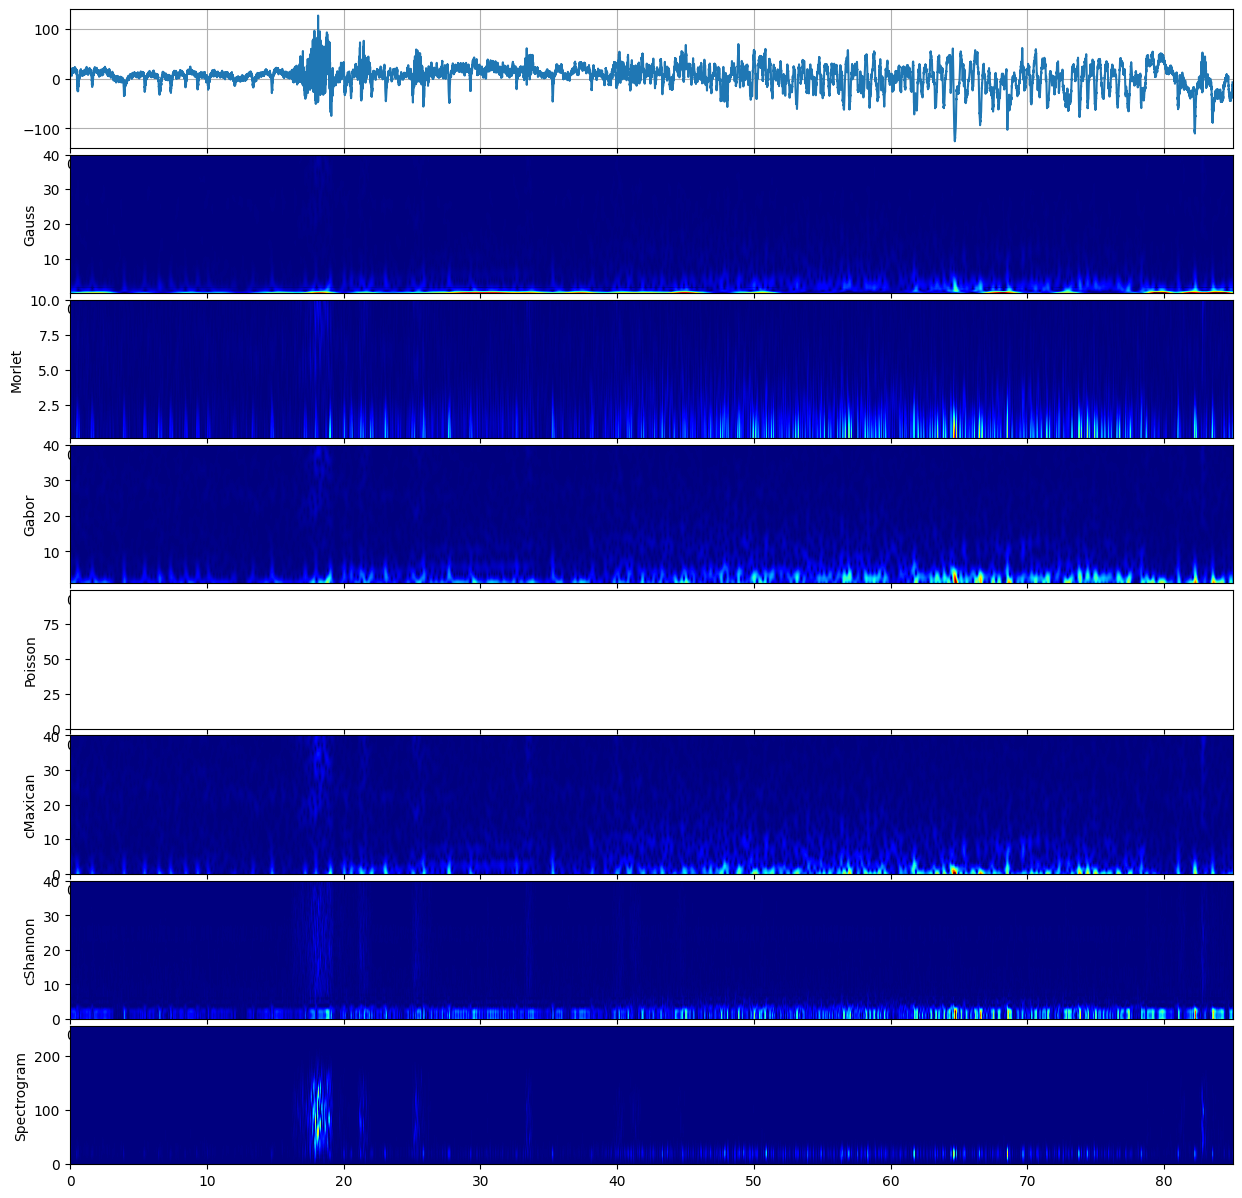

In [5]:
import spkit as sp
from spkit.core.cwt import ScalogramCWT
from spkit.core.cwt import compare_cwt_example

x = df['EEG Fc1'].values[(start_time_s-10)*512:(end_time_s+5)*512]
fs = 512
t = np.arange(len(x))/fs

compare_cwt_example(x,t,fs=fs)
